## Multi-varite Time Series Models Comparison

(203, 14)


,realgdp,realcons,realinv,realgovt,realdpi
1,0.024933,0.015277,0.079945,0.023615,0.017225
2,-0.001193,0.010380,-0.071891,0.020439,-0.001720
3,0.003493,0.001083,0.034309,-0.014751,0.007741
4,0.022182,0.009529,0.102339,-0.046099,0.012446
5,-0.004683,0.012565,-0.106356,-0.003891,0.005403


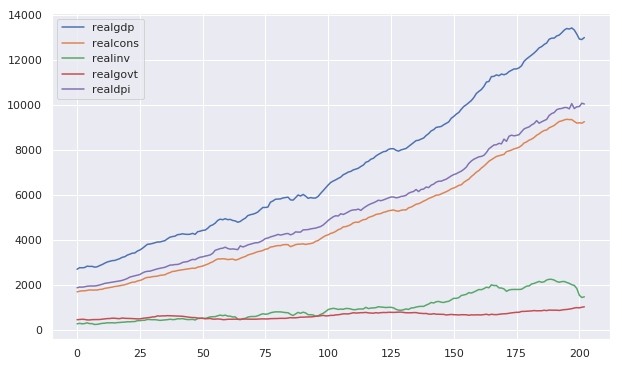

In [1]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.tsa.api import VAR

from keras.models import Sequential, Model
from keras.layers.core import Dense, Dropout, Activation, Flatten, Lambda
from keras.layers import Conv1D, MaxPooling1D, AtrousConvolution1D, RepeatVector
from keras.layers.recurrent import LSTM, GRU
from keras.layers.normalization import BatchNormalization
from keras.optimizers import RMSprop, Adam, SGD, Nadam
from keras.layers.advanced_activations import *

## load data
mdata = sm.datasets.macrodata.load_pandas().data
print(mdata.shape)
mdata[mdata.columns[2:7]].plot(figsize=(10,6));

## detrend data
data = np.log1p(mdata[mdata.columns[2:7]]).diff().dropna()
data.head()

### Baseline model: using lag1 as prediction

In [2]:
print('feature: realgdp')
preds = mdata['realgdp'].shift()
print('mae:', np.mean(np.abs((preds - mdata['realgdp']).dropna())))
print('mse:', np.mean(((preds - mdata['realgdp']).dropna()**2)))

feature: realgdp
mae: 64.8978217821782
mse: 6174.570468762373


### Convolutional Neural Nets

In [3]:
# data_original = pd.read_csv('https://raw.githubusercontent.com/Rachnog/Deep-Trading/master/multivariate/data/AAPL1216.csv')[::-1]

## original data, w/ detrend + log1p transform
realgdp = data['realgdp'].tolist()
realcons = data['realcons'].tolist()
realinv = data['realinv'].tolist()
realgovt = data['realgovt'].tolist()
realdpi = data['realdpi'].tolist()


WINDOW = 30
EMB_SIZE = 5
STEP = 1
FORECAST = 1

X, Y = [], []
for i in range(0, len(data), STEP): 
    try:
        gdp = realgdp[i:i+WINDOW]
        con = realcons[i:i+WINDOW]
        inv = realinv[i:i+WINDOW]
        gov = realgovt[i:i+WINDOW]
        dpi = realdpi[i:i+WINDOW]

        gdp = (np.array(gdp) - np.mean(gdp)) / np.std(gdp)
        con = (np.array(con) - np.mean(con)) / np.std(con)
        inv = (np.array(inv) - np.mean(inv)) / np.std(inv)
        gov = (np.array(gov) - np.mean(gov)) / np.std(gov)
        dpi = (np.array(dpi) - np.mean(dpi)) / np.std(dpi)

        x_i = np.column_stack((gdp, con, inv, gov, dpi))
        y_i = realgdp[i+WINDOW]
        
#         if realgdp[i+WINDOW] < realgdp[i+WINDOW+FORECAST]:
#             y_i = [1, 0]
#         else:
#             y_i = [0, 1] 

    except Exception as e:
        break

    X.append(x_i)
    Y.append(y_i)

X, Y = np.array(X), np.array(Y)

## split dataset 80:20
split = int(X.shape[0]*.8)
X_train, Y_train = X[:split], Y[:split]
X_test, Y_test = X[split:], Y[split:]

data.shape, X.shape, X_train.shape, X_test.shape

((202, 5), (172, 30, 5), (137, 30, 5), (35, 30, 5))

Train on 137 samples, validate on 35 samples
Epoch 1/300
137/137 [==============================] - 3s 23ms/step - loss: 0.8603 - val_loss: 0.3513
Epoch 2/300
137/137 [==============================] - 0s 436us/step - loss: 0.7427 - val_loss: 0.3370
Epoch 3/300
137/137 [==============================] - 0s 498us/step - loss: 0.6923 - val_loss: 0.2924
Epoch 4/300
137/137 [==============================] - 0s 581us/step - loss: 0.5726 - val_loss: 0.2758
Epoch 5/300
137/137 [==============================] - 0s 538us/step - loss: 0.6418 - val_loss: 0.2583
Epoch 6/300
137/137 [==============================] - 0s 813us/step - loss: 0.5240 - val_loss: 0.2335
Epoch 7/300
137/137 [==============================] - 0s 868us/step - loss: 0.5283 - val_loss: 0.2227
Epoch 8/300
137/137 [==============================] - 0s 578us/step - loss: 0.4271 - val_loss: 0.2114
Epoch 9/300
137/137 [==============================] - 0s 712us/step - loss: 0.4089 - val_loss: 0.1912
Epoch 10/300
137/137 [=======

137/137 [==============================] - 0s 576us/step - loss: 0.1783 - val_loss: 0.0894
Epoch 80/300
137/137 [==============================] - 0s 672us/step - loss: 0.1799 - val_loss: 0.0906
Epoch 81/300
137/137 [==============================] - 0s 399us/step - loss: 0.1714 - val_loss: 0.0946
Epoch 82/300
137/137 [==============================] - 0s 379us/step - loss: 0.1685 - val_loss: 0.0972
Epoch 83/300
137/137 [==============================] - 0s 360us/step - loss: 0.1717 - val_loss: 0.0952
Epoch 84/300
137/137 [==============================] - 0s 385us/step - loss: 0.1829 - val_loss: 0.0961
Epoch 85/300
137/137 [==============================] - 0s 429us/step - loss: 0.1792 - val_loss: 0.0972
Epoch 86/300
137/137 [==============================] - 0s 448us/step - loss: 0.1560 - val_loss: 0.0971
Epoch 87/300
137/137 [==============================] - 0s 646us/step - loss: 0.1689 - val_loss: 0.0939
Epoch 88/300
137/137 [==============================] - 0s 505us/step - loss:

137/137 [==============================] - 0s 408us/step - loss: 0.0756 - val_loss: 0.0473
Epoch 158/300
137/137 [==============================] - 0s 513us/step - loss: 0.0926 - val_loss: 0.0470
Epoch 159/300
137/137 [==============================] - 0s 566us/step - loss: 0.0725 - val_loss: 0.0454
Epoch 160/300
137/137 [==============================] - 0s 428us/step - loss: 0.0734 - val_loss: 0.0438
Epoch 161/300
137/137 [==============================] - 0s 496us/step - loss: 0.0751 - val_loss: 0.0431
Epoch 162/300
137/137 [==============================] - 0s 498us/step - loss: 0.0766 - val_loss: 0.0425
Epoch 163/300
137/137 [==============================] - 0s 587us/step - loss: 0.0731 - val_loss: 0.0412
Epoch 164/300
137/137 [==============================] - 0s 424us/step - loss: 0.0705 - val_loss: 0.0412
Epoch 165/300
137/137 [==============================] - 0s 652us/step - loss: 0.0771 - val_loss: 0.0411
Epoch 166/300
137/137 [==============================] - 0s 637us/ste

137/137 [==============================] - 0s 390us/step - loss: 0.0177 - val_loss: 0.0104
Epoch 236/300
137/137 [==============================] - 0s 497us/step - loss: 0.0173 - val_loss: 0.0099
Epoch 237/300
137/137 [==============================] - 0s 417us/step - loss: 0.0173 - val_loss: 0.0087
Epoch 238/300
137/137 [==============================] - 0s 395us/step - loss: 0.0168 - val_loss: 0.0089
Epoch 239/300
137/137 [==============================] - 0s 415us/step - loss: 0.0157 - val_loss: 0.0097
Epoch 240/300
137/137 [==============================] - 0s 439us/step - loss: 0.0150 - val_loss: 0.0097
Epoch 241/300
137/137 [==============================] - 0s 369us/step - loss: 0.0148 - val_loss: 0.0102
Epoch 242/300
137/137 [==============================] - 0s 681us/step - loss: 0.0128 - val_loss: 0.0091
Epoch 243/300
137/137 [==============================] - 0s 381us/step - loss: 0.0127 - val_loss: 0.0085
Epoch 244/300
137/137 [==============================] - 0s 491us/ste

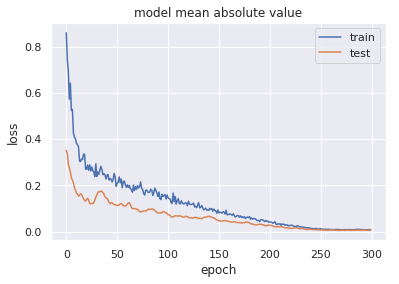

In [11]:
model = Sequential()
model.add(Conv1D(input_shape = (WINDOW, EMB_SIZE),
                 filters=16,
                 kernel_size=4,
                 padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.5))

model.add(Conv1D(filters=8,
                 kernel_size=4,
                 padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(64))
model.add(BatchNormalization())
model.add(LeakyReLU())

model.add(Dense(1))
# model.add(Activation('softmax'))

model.compile(optimizer=Adam(),
              loss='mean_absolute_error')

t0 = time()
history = model.fit(X_train, Y_train, 
          epochs = 300,
          batch_size = 32,
          verbose=1, 
          validation_data=(X_test, Y_test),
          shuffle=True)
t1 = time()
print("Time used:", t1-t0)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model mean absolute value')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [ ]:
# pred_train= model.predict(np.array(X_train))
# plt.figure(figsize=(16,4))
# plt.plot(data['realgdp'][:split+WINDOW], '.-')
# plt.plot(range(WINDOW+1, WINDOW+1+len(pred_train)), pred_train, '.-')

# pred_test= model.predict(np.array(X_test))
# plt.plot(data['realgdp'][split+WINDOW:], '.-')
# plt.plot(range(split+WINDOW+1,split+WINDOW+1+len(pred_test)), pred_test, '.-')


# print('train-mae:', np.mean(np.abs(pred_train.reshape(-1,1) - Y_train.reshape(-1,1))))
# print('test-mae:', np.mean(np.abs(pred_test.reshape(-1,1) - Y_test.reshape(-1,1))))

# print('train-mse:', np.mean((pred_train.reshape(-1,1) - Y_train.reshape(-1,1))**2))
# print('test-mse:', np.mean((pred_test.reshape(-1,1) - Y_test.reshape(-1,1))**2))

train-mae: 52.732852589176375
train-mse: 3382.7592155308525
test-mae: 100.41741385946484
test-mse: 11254.319518557775
Time used for training: 27.438759803771973


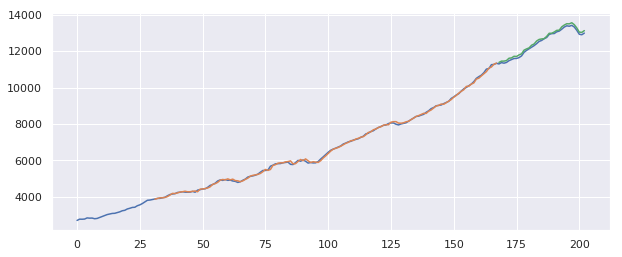

In [12]:
pred_train= model.predict(np.array(X_train))
pred_train_cvtback = np.exp(pred_train.reshape(-1,1) + np.log1p(mdata['realgdp'].tolist()[WINDOW:WINDOW+137]).reshape(-1,1))

pred_test= model.predict(np.array(X_test))
pred_test_cvtback = np.exp(pred_test.reshape(-1,1) + np.log1p(mdata['realgdp'].tolist()[-35:]).reshape(-1,1))

plt.figure(figsize=(10,4))
plt.plot(mdata['realgdp'])
plt.plot(range(WINDOW+1, WINDOW+1+137), pred_train_cvtback)
plt.plot(range(137+WINDOW+1, 137+WINDOW+1+35), pred_test_cvtback)

print('train-mae:', np.mean(np.abs(pred_train_cvtback.reshape(-1,1) - np.array(mdata['realgdp'][WINDOW:WINDOW+137]).reshape(-1,1))))
print('train-mse:', np.mean((pred_train_cvtback.reshape(-1,1) -np.array(mdata['realgdp'][WINDOW:WINDOW+137]).reshape(-1,1))**2))

print('test-mae:', np.mean(np.abs(pred_test_cvtback.reshape(-1,1) - np.array(mdata['realgdp'][-35:]).reshape(-1,1))))
print('test-mse:', np.mean((pred_test_cvtback.reshape(-1,1) -np.array(mdata['realgdp'][-35:]).reshape(-1,1))**2))

print("Time used for training:", t1-t0)

## Dilated Causal Convolutional Neural Nets

Train on 137 samples, validate on 35 samples
Epoch 1/300
137/137 [==============================] - 3s 21ms/step - loss: 0.6833 - val_loss: 0.4346
Epoch 2/300
137/137 [==============================] - 0s 419us/step - loss: 0.6704 - val_loss: 0.3689
Epoch 3/300
137/137 [==============================] - 0s 672us/step - loss: 0.6669 - val_loss: 0.3298
Epoch 4/300
137/137 [==============================] - 0s 639us/step - loss: 0.6035 - val_loss: 0.2803
Epoch 5/300
137/137 [==============================] - 0s 497us/step - loss: 0.5560 - val_loss: 0.2445
Epoch 6/300
137/137 [==============================] - 0s 618us/step - loss: 0.5054 - val_loss: 0.2184
Epoch 7/300
137/137 [==============================] - 0s 598us/step - loss: 0.4239 - val_loss: 0.1965
Epoch 8/300
137/137 [==============================] - 0s 475us/step - loss: 0.3708 - val_loss: 0.1733
Epoch 9/300
137/137 [==============================] - 0s 511us/step - loss: 0.4255 - val_loss: 0.1581
Epoch 10/300
137/137 [=======

137/137 [==============================] - 0s 538us/step - loss: 0.1621 - val_loss: 0.0707
Epoch 80/300
137/137 [==============================] - 0s 663us/step - loss: 0.1538 - val_loss: 0.0689
Epoch 81/300
137/137 [==============================] - 0s 706us/step - loss: 0.1717 - val_loss: 0.0700
Epoch 82/300
137/137 [==============================] - 0s 732us/step - loss: 0.1546 - val_loss: 0.0708
Epoch 83/300
137/137 [==============================] - 0s 874us/step - loss: 0.1575 - val_loss: 0.0709
Epoch 84/300
137/137 [==============================] - 0s 498us/step - loss: 0.1558 - val_loss: 0.0747
Epoch 85/300
137/137 [==============================] - 0s 727us/step - loss: 0.1560 - val_loss: 0.0803
Epoch 86/300
137/137 [==============================] - 0s 575us/step - loss: 0.1488 - val_loss: 0.0829
Epoch 87/300
137/137 [==============================] - 0s 480us/step - loss: 0.1657 - val_loss: 0.0835
Epoch 88/300
137/137 [==============================] - 0s 497us/step - loss:

137/137 [==============================] - 0s 442us/step - loss: 0.0685 - val_loss: 0.0378
Epoch 158/300
137/137 [==============================] - 0s 526us/step - loss: 0.0746 - val_loss: 0.0390
Epoch 159/300
137/137 [==============================] - 0s 578us/step - loss: 0.0744 - val_loss: 0.0390
Epoch 160/300
137/137 [==============================] - 0s 434us/step - loss: 0.0744 - val_loss: 0.0385
Epoch 161/300
137/137 [==============================] - 0s 423us/step - loss: 0.0612 - val_loss: 0.0395
Epoch 162/300
137/137 [==============================] - 0s 498us/step - loss: 0.0603 - val_loss: 0.0396
Epoch 163/300
137/137 [==============================] - 0s 408us/step - loss: 0.0591 - val_loss: 0.0365
Epoch 164/300
137/137 [==============================] - 0s 473us/step - loss: 0.0636 - val_loss: 0.0347
Epoch 165/300
137/137 [==============================] - 0s 837us/step - loss: 0.0626 - val_loss: 0.0374
Epoch 166/300
137/137 [==============================] - 0s 597us/ste

137/137 [==============================] - 0s 2ms/step - loss: 0.0115 - val_loss: 0.0073
Epoch 236/300
137/137 [==============================] - 0s 1ms/step - loss: 0.0120 - val_loss: 0.0069
Epoch 237/300
137/137 [==============================] - 0s 913us/step - loss: 0.0109 - val_loss: 0.0091
Epoch 238/300
137/137 [==============================] - 0s 493us/step - loss: 0.0108 - val_loss: 0.0104
Epoch 239/300
137/137 [==============================] - 0s 389us/step - loss: 0.0105 - val_loss: 0.0078
Epoch 240/300
137/137 [==============================] - 0s 475us/step - loss: 0.0105 - val_loss: 0.0077
Epoch 241/300
137/137 [==============================] - 0s 2ms/step - loss: 0.0104 - val_loss: 0.0086
Epoch 242/300
137/137 [==============================] - 0s 738us/step - loss: 0.0115 - val_loss: 0.0077
Epoch 243/300
137/137 [==============================] - 0s 510us/step - loss: 0.0103 - val_loss: 0.0077
Epoch 244/300
137/137 [==============================] - 0s 471us/step - lo

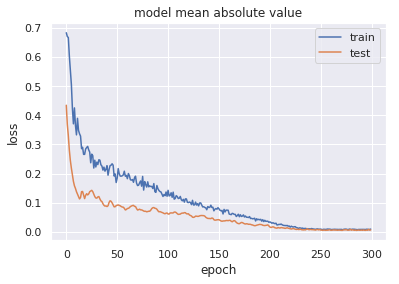

In [13]:
model = Sequential()
model.add(Conv1D(input_shape = (WINDOW, EMB_SIZE),
                 filters=16,
                 kernel_size=4,
                 padding='causal',
                 dilation_rate=1))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.5))

model.add(Conv1D(filters=8,
                 kernel_size=4,
                 padding='causal',
                 dilation_rate=2))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(64))
model.add(BatchNormalization())
model.add(LeakyReLU())


model.add(Dense(1))
# model.add(Activation('softmax'))

model.compile(optimizer=Adam(),
              loss='mean_absolute_error')

t0 = time()
history = model.fit(X_train, Y_train, 
          epochs = 300,
          batch_size = 32,
          verbose=1, 
          validation_data=(X_test, Y_test),
          shuffle=True)
t1 = time()
print("Time used:", t1-t0)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model mean absolute value')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

train-mae: 52.82932174807055
train-mse: 3840.216479556324
test-mae: 92.91100079337464
test-mse: 10883.26536250366
Time used for training: 31.0342538356781


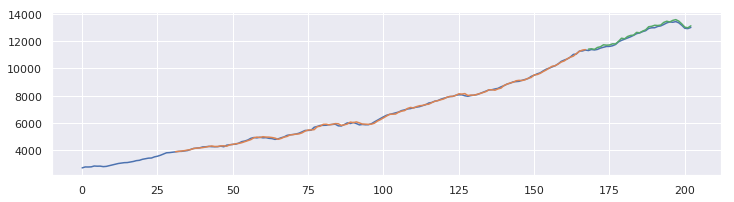

In [14]:
pred_train= model.predict(np.array(X_train))
pred_train_cvtback = np.exp(pred_train.reshape(-1,1) + np.log1p(mdata['realgdp'].tolist()[WINDOW:WINDOW+137]).reshape(-1,1))

pred_test= model.predict(np.array(X_test))
pred_test_cvtback = np.exp(pred_test.reshape(-1,1) + np.log1p(mdata['realgdp'].tolist()[-35:]).reshape(-1,1))

plt.figure(figsize=(12,3))
plt.plot(mdata['realgdp'])
plt.plot(range(WINDOW+1, WINDOW+1+137), pred_train_cvtback)
plt.plot(range(137+WINDOW+1, 137+WINDOW+1+35), pred_test_cvtback)

print('train-mae:', np.mean(np.abs(pred_train_cvtback.reshape(-1,1) - np.array(mdata['realgdp'][WINDOW:WINDOW+137]).reshape(-1,1))))
print('train-mse:', np.mean((pred_train_cvtback.reshape(-1,1) -np.array(mdata['realgdp'][WINDOW:WINDOW+137]).reshape(-1,1))**2))

print('test-mae:', np.mean(np.abs(pred_test_cvtback.reshape(-1,1) - np.array(mdata['realgdp'][-35:]).reshape(-1,1))))
print('test-mse:', np.mean((pred_test_cvtback.reshape(-1,1) -np.array(mdata['realgdp'][-35:]).reshape(-1,1))**2))
print("Time used for training:", t1-t0)

### 4-step prediction for 1 feature

In [32]:
## original data, w/ detrend + log1p transform
realgdp = data['realgdp'].tolist()
realcons = data['realcons'].tolist()
realinv = data['realinv'].tolist()
realgovt = data['realgovt'].tolist()
realdpi = data['realdpi'].tolist()


WINDOW = 30
EMB_SIZE = 5
STEP = 1
FORECAST = 4

X, Y = [], []
for i in range(0, len(data), STEP): 
    try:
        gdp = realgdp[i:i+WINDOW]
        con = realcons[i:i+WINDOW]
        inv = realinv[i:i+WINDOW]
        gov = realgovt[i:i+WINDOW]
        dpi = realdpi[i:i+WINDOW]

        gdp = (np.array(gdp) - np.mean(gdp)) / np.std(gdp)
        con = (np.array(con) - np.mean(con)) / np.std(con)
        inv = (np.array(inv) - np.mean(inv)) / np.std(inv)
        gov = (np.array(gov) - np.mean(gov)) / np.std(gov)
        dpi = (np.array(dpi) - np.mean(dpi)) / np.std(dpi)

        x_i = np.column_stack((gdp, con, inv, gov, dpi))
        y_i = realgdp[(i+WINDOW):(i+WINDOW+FORECAST)]
         
    except Exception as e:
        break

    if len(y_i) == FORECAST:
        X.append(x_i)
        Y.append(y_i)
    
    

X, Y = np.array(X), np.array(Y)

## split dataset 80:20
split = int(X.shape[0]*.8)
X_train, Y_train = X[:split], Y[:split]
X_test, Y_test = X[split:], Y[split:]

print(X.shape, Y.shape, X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(169, 30, 5) (169, 4) (135, 30, 5) (135, 4) (34, 30, 5) (34, 4)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


Train on 135 samples, validate on 34 samples
Epoch 1/300
135/135 [==============================] - 4s 27ms/step - loss: 0.8853 - val_loss: 0.3115
Epoch 2/300
135/135 [==============================] - 0s 2ms/step - loss: 0.7973 - val_loss: 0.2900
Epoch 3/300
135/135 [==============================] - 0s 966us/step - loss: 0.7609 - val_loss: 0.2714
Epoch 4/300
135/135 [==============================] - 0s 541us/step - loss: 0.6529 - val_loss: 0.2618
Epoch 5/300
135/135 [==============================] - 0s 636us/step - loss: 0.6528 - val_loss: 0.2588
Epoch 6/300
135/135 [==============================] - 0s 2ms/step - loss: 0.5566 - val_loss: 0.2642
Epoch 7/300
135/135 [==============================] - 0s 1ms/step - loss: 0.5634 - val_loss: 0.2726
Epoch 8/300
135/135 [==============================] - 0s 1ms/step - loss: 0.5184 - val_loss: 0.2790
Epoch 9/300
135/135 [==============================] - 0s 802us/step - loss: 0.5200 - val_loss: 0.2799
Epoch 10/300
135/135 [===============

135/135 [==============================] - 0s 498us/step - loss: 0.1428 - val_loss: 0.0763
Epoch 80/300
135/135 [==============================] - 0s 643us/step - loss: 0.1516 - val_loss: 0.0734
Epoch 81/300
135/135 [==============================] - 0s 726us/step - loss: 0.1562 - val_loss: 0.0713
Epoch 82/300
135/135 [==============================] - 0s 720us/step - loss: 0.1416 - val_loss: 0.0715
Epoch 83/300
135/135 [==============================] - 0s 759us/step - loss: 0.1432 - val_loss: 0.0699
Epoch 84/300
135/135 [==============================] - 0s 589us/step - loss: 0.1462 - val_loss: 0.0685
Epoch 85/300
135/135 [==============================] - 0s 731us/step - loss: 0.1443 - val_loss: 0.0697
Epoch 86/300
135/135 [==============================] - 0s 736us/step - loss: 0.1436 - val_loss: 0.0721
Epoch 87/300
135/135 [==============================] - 0s 764us/step - loss: 0.1364 - val_loss: 0.0716
Epoch 88/300
135/135 [==============================] - 0s 678us/step - loss:

135/135 [==============================] - 0s 541us/step - loss: 0.0691 - val_loss: 0.0354
Epoch 158/300
135/135 [==============================] - 0s 732us/step - loss: 0.0707 - val_loss: 0.0357
Epoch 159/300
135/135 [==============================] - 0s 500us/step - loss: 0.0682 - val_loss: 0.0352
Epoch 160/300
135/135 [==============================] - 0s 516us/step - loss: 0.0672 - val_loss: 0.0353
Epoch 161/300
135/135 [==============================] - 0s 510us/step - loss: 0.0671 - val_loss: 0.0355
Epoch 162/300
135/135 [==============================] - 0s 502us/step - loss: 0.0608 - val_loss: 0.0362
Epoch 163/300
135/135 [==============================] - 0s 660us/step - loss: 0.0661 - val_loss: 0.0370
Epoch 164/300
135/135 [==============================] - 0s 819us/step - loss: 0.0658 - val_loss: 0.0363
Epoch 165/300
135/135 [==============================] - 0s 538us/step - loss: 0.0655 - val_loss: 0.0354
Epoch 166/300
135/135 [==============================] - 0s 485us/ste

135/135 [==============================] - 0s 507us/step - loss: 0.0205 - val_loss: 0.0120
Epoch 236/300
135/135 [==============================] - 0s 650us/step - loss: 0.0204 - val_loss: 0.0116
Epoch 237/300
135/135 [==============================] - 0s 649us/step - loss: 0.0204 - val_loss: 0.0113
Epoch 238/300
135/135 [==============================] - 0s 573us/step - loss: 0.0191 - val_loss: 0.0112
Epoch 239/300
135/135 [==============================] - 0s 660us/step - loss: 0.0200 - val_loss: 0.0109
Epoch 240/300
135/135 [==============================] - 0s 701us/step - loss: 0.0185 - val_loss: 0.0106
Epoch 241/300
135/135 [==============================] - 0s 1ms/step - loss: 0.0187 - val_loss: 0.0107
Epoch 242/300
135/135 [==============================] - 0s 604us/step - loss: 0.0180 - val_loss: 0.0106
Epoch 243/300
135/135 [==============================] - 0s 607us/step - loss: 0.0176 - val_loss: 0.0115
Epoch 244/300
135/135 [==============================] - 0s 547us/step 

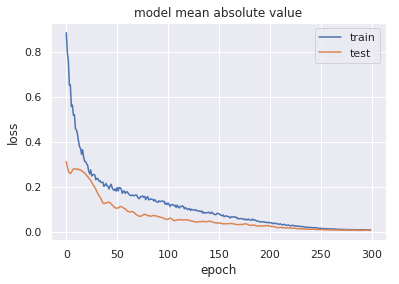

In [33]:
model = Sequential()
model.add(Conv1D(input_shape = (WINDOW, EMB_SIZE),
                 filters=16,
                 kernel_size=4,
                 padding='causal',
                 dilation_rate=1))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.5))

model.add(Conv1D(filters=8,
                 kernel_size=4,
                 padding='causal',
                 dilation_rate=2))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(64))
model.add(BatchNormalization())
model.add(LeakyReLU())


model.add(Dense(4))
# model.add(Activation('softmax'))

model.compile(optimizer=Adam(),
              loss='mean_absolute_error')

t0 = time()
history = model.fit(X_train, Y_train, 
          epochs = 300,
          batch_size = 32, 
          validation_data=(X_test, Y_test),
          shuffle=True)
t1 = time()
print("Time used:", t1-t0)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model mean absolute value')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

train-mae: 62.39665578690359
train-mse: 4362.882553653503
Time used for training: 32.321049451828


Text(0.5,1,'align pred values w/ lag')

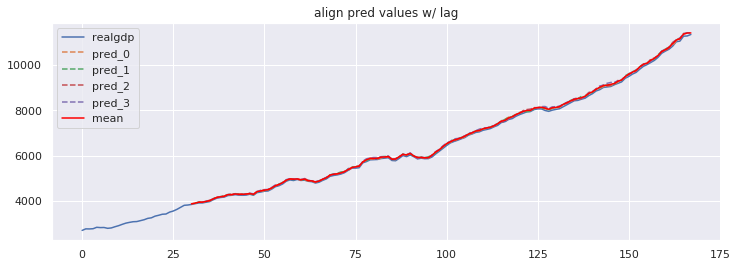

In [34]:
pred_train= model.predict(np.array(X_train))

pred_train_cvtback_0 = np.exp(pred_train[:,0].reshape(-1,1) + np.log1p(mdata['realgdp'].tolist()[WINDOW:WINDOW+135]).reshape(-1,1))
pred_train_cvtback_1 = np.exp(pred_train[:,1].reshape(-1,1) + np.log1p(mdata['realgdp'].tolist()[WINDOW+1:WINDOW+135+1]).reshape(-1,1))
pred_train_cvtback_2 = np.exp(pred_train[:,2].reshape(-1,1) + np.log1p(mdata['realgdp'].tolist()[WINDOW+2:WINDOW+135+2]).reshape(-1,1))
pred_train_cvtback_3 = np.exp(pred_train[:,3].reshape(-1,1) + np.log1p(mdata['realgdp'].tolist()[WINDOW+3:WINDOW+135+3]).reshape(-1,1))

pred_cvtback_df = pd.DataFrame({'pred_train_cvtback_0': np.append(pred_train_cvtback_0.flatten(),[np.NaN, np.NaN, np.NaN]), 
                                'pred_train_cvtback_1': np.append(pred_train_cvtback_1.flatten(),[np.NaN, np.NaN, np.NaN]),
                                'pred_train_cvtback_2': np.append(pred_train_cvtback_2.flatten(),[np.NaN, np.NaN, np.NaN]),
                                'pred_train_cvtback_3': np.append(pred_train_cvtback_3.flatten(),[np.NaN, np.NaN, np.NaN])})
pred_cvtback_df['pred_train_cvtback_1'] = pred_cvtback_df['pred_train_cvtback_1'].shift(1)
pred_cvtback_df['pred_train_cvtback_2'] = pred_cvtback_df['pred_train_cvtback_2'].shift(2)
pred_cvtback_df['pred_train_cvtback_3'] = pred_cvtback_df['pred_train_cvtback_3'].shift(3)

# pred_cvtback_df
pred_cvtback_smooth = pred_cvtback_df.mean(axis=1)
print('train-mae:', np.mean(np.abs(np.array(pred_cvtback_smooth).reshape(-1,1) - np.array(mdata['realgdp'][WINDOW:WINDOW+135+3]).reshape(-1,1))))
print('train-mse:', np.mean((np.array(pred_cvtback_smooth).reshape(-1,1) -np.array(mdata['realgdp'][WINDOW:WINDOW+135+3]).reshape(-1,1))**2))
print("Time used for training:", t1-t0)

plt.figure(figsize=(12,4))
plt.plot(range(WINDOW+135+3),mdata['realgdp'][:WINDOW+135+3])
plt.plot(range(WINDOW, WINDOW+135), pred_train_cvtback_0, '--')
plt.plot(range(WINDOW+1,WINDOW+135+1), pred_train_cvtback_1, '--')
plt.plot(range(WINDOW+2,WINDOW+135+2), pred_train_cvtback_2, '--')
plt.plot(range(WINDOW+3,WINDOW+135+3), pred_train_cvtback_3, '--')
plt.plot(range(WINDOW, WINDOW+135+3), pred_cvtback_smooth, color='red')
plt.legend(['realgdp', 'pred_0', 'pred_1', 'pred_2', 'pred_3', 'mean'])
plt.title('align pred values w/ lag')

test-mae: 114.37966404168942
test-mse: 13640.514735692645


Text(0.5,1,'align pred values w/ lag')

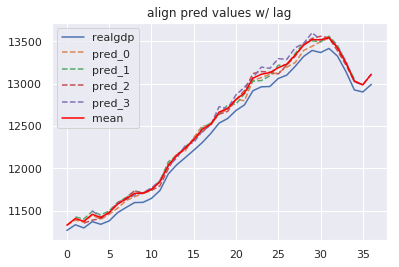

In [35]:
pred_test= model.predict(np.array(X_test))

pred_test_cvtback_0 = np.exp(pred_test[:,0].reshape(-1,1) + np.log1p(mdata['realgdp'].tolist()[-37:-3]).reshape(-1,1))
pred_test_cvtback_1 = np.exp(pred_test[:,1].reshape(-1,1) + np.log1p(mdata['realgdp'].tolist()[-36:-2]).reshape(-1,1))
pred_test_cvtback_2 = np.exp(pred_test[:,2].reshape(-1,1) + np.log1p(mdata['realgdp'].tolist()[-35:-1]).reshape(-1,1))
pred_test_cvtback_3 = np.exp(pred_test[:,3].reshape(-1,1) + np.log1p(mdata['realgdp'].tolist()[-34:]).reshape(-1,1))

pred_cvtback_df = pd.DataFrame({'pred_test_cvtback_0': np.append(pred_test_cvtback_0.flatten(),[np.NaN, np.NaN, np.NaN]), 
                                'pred_test_cvtback_1': np.append(pred_test_cvtback_1.flatten(),[np.NaN, np.NaN, np.NaN]),
                                'pred_test_cvtback_2': np.append(pred_test_cvtback_2.flatten(),[np.NaN, np.NaN, np.NaN]),
                                'pred_test_cvtback_3': np.append(pred_test_cvtback_3.flatten(),[np.NaN, np.NaN, np.NaN])})
pred_cvtback_df['pred_test_cvtback_1'] = pred_cvtback_df['pred_test_cvtback_1'].shift(1)
pred_cvtback_df['pred_test_cvtback_2'] = pred_cvtback_df['pred_test_cvtback_2'].shift(2)
pred_cvtback_df['pred_test_cvtback_3'] = pred_cvtback_df['pred_test_cvtback_3'].shift(3)

# pred_cvtback_df
pred_cvtback_smooth = pred_cvtback_df.mean(axis=1)
print('test-mae:', np.mean(np.abs(np.array(pred_cvtback_smooth).reshape(-1,1) - np.array(mdata['realgdp'][-37:]).reshape(-1,1))))
print('test-mse:', np.mean((np.array(pred_cvtback_smooth).reshape(-1,1) -np.array(mdata['realgdp'][-37:]).reshape(-1,1))**2))

plt.subplots()
plt.plot(range(37),mdata['realgdp'][-37:])
plt.plot(pred_test_cvtback_0, '--')
plt.plot(range(1,1+34), pred_test_cvtback_1, '--')
plt.plot(range(2,2+34), pred_test_cvtback_2, '--')
plt.plot(range(3,3+34), pred_test_cvtback_3, '--')
plt.plot(pred_cvtback_df.mean(axis=1), color='red')
plt.legend(['realgdp', 'pred_0', 'pred_1', 'pred_2', 'pred_3', 'mean'])
plt.title('align pred values w/ lag')

## 1-step forecasting for 5 features

In [26]:
## original data, w/ detrend + log1p transform
realgdp = data['realgdp'].tolist()
realcons = data['realcons'].tolist()
realinv = data['realinv'].tolist()
realgovt = data['realgovt'].tolist()
realdpi = data['realdpi'].tolist()


WINDOW = 30
EMB_SIZE = 5
STEP = 1
FORECAST = 1

X, Y = [], []
for i in range(0, len(data), STEP): 
    try:
        gdp = realgdp[i:i+WINDOW]
        con = realcons[i:i+WINDOW]
        inv = realinv[i:i+WINDOW]
        gov = realgovt[i:i+WINDOW]
        dpi = realdpi[i:i+WINDOW]

        gdp = (np.array(gdp) - np.mean(gdp)) / np.std(gdp)
        con = (np.array(con) - np.mean(con)) / np.std(con)
        inv = (np.array(inv) - np.mean(inv)) / np.std(inv)
        gov = (np.array(gov) - np.mean(gov)) / np.std(gov)
        dpi = (np.array(dpi) - np.mean(dpi)) / np.std(dpi)

        x_i = np.column_stack((gdp, con, inv, gov, dpi))
        y_i = np.array([realgdp[i+WINDOW],
                        realcons[i+WINDOW],
                        realinv[i+WINDOW],
                        realgovt[i+WINDOW],
                        realdpi[i+WINDOW]])

    except Exception as e:
        break

    X.append(x_i)
    Y.append(y_i)

X, Y = np.array(X), np.array(Y)

# print(X.shape, Y.shape)
## split dataset 80:20
split = int(X.shape[0]*.8)
X_train, Y_train = X[:split], Y[:split]
X_test, Y_test = X[split:], Y[split:]

print(data.shape, X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(202, 5) (172, 30, 5) (137, 30, 5) (35, 30, 5)
(172, 5) (137, 5) (35, 5)


Train on 137 samples, validate on 35 samples
Epoch 1/300
137/137 [==============================] - 4s 32ms/step - loss: 0.7803 - val_loss: 0.3550
Epoch 2/300
137/137 [==============================] - 0s 503us/step - loss: 0.7314 - val_loss: 0.3198
Epoch 3/300
137/137 [==============================] - 0s 450us/step - loss: 0.7070 - val_loss: 0.2918
Epoch 4/300
137/137 [==============================] - 0s 591us/step - loss: 0.6347 - val_loss: 0.2682
Epoch 5/300
137/137 [==============================] - 0s 500us/step - loss: 0.6145 - val_loss: 0.2508
Epoch 6/300
137/137 [==============================] - 0s 509us/step - loss: 0.5363 - val_loss: 0.2388
Epoch 7/300
137/137 [==============================] - 0s 443us/step - loss: 0.5028 - val_loss: 0.2287
Epoch 8/300
137/137 [==============================] - 0s 423us/step - loss: 0.4871 - val_loss: 0.2212
Epoch 9/300
137/137 [==============================] - 0s 537us/step - loss: 0.4681 - val_loss: 0.2135
Epoch 10/300
137/137 [=======

137/137 [==============================] - 0s 439us/step - loss: 0.1252 - val_loss: 0.0800
Epoch 80/300
137/137 [==============================] - 0s 474us/step - loss: 0.1304 - val_loss: 0.0790
Epoch 81/300
137/137 [==============================] - 0s 421us/step - loss: 0.1401 - val_loss: 0.0788
Epoch 82/300
137/137 [==============================] - 0s 549us/step - loss: 0.1270 - val_loss: 0.0786
Epoch 83/300
137/137 [==============================] - 0s 693us/step - loss: 0.1363 - val_loss: 0.0793
Epoch 84/300
137/137 [==============================] - 0s 568us/step - loss: 0.1308 - val_loss: 0.0796
Epoch 85/300
137/137 [==============================] - 0s 444us/step - loss: 0.1263 - val_loss: 0.0784
Epoch 86/300
137/137 [==============================] - 0s 487us/step - loss: 0.1263 - val_loss: 0.0768
Epoch 87/300
137/137 [==============================] - 0s 463us/step - loss: 0.1208 - val_loss: 0.0767
Epoch 88/300
137/137 [==============================] - 0s 515us/step - loss:

137/137 [==============================] - 0s 549us/step - loss: 0.0623 - val_loss: 0.0401
Epoch 158/300
137/137 [==============================] - 0s 581us/step - loss: 0.0566 - val_loss: 0.0389
Epoch 159/300
137/137 [==============================] - 0s 518us/step - loss: 0.0589 - val_loss: 0.0379
Epoch 160/300
137/137 [==============================] - 0s 604us/step - loss: 0.0599 - val_loss: 0.0382
Epoch 161/300
137/137 [==============================] - 0s 510us/step - loss: 0.0599 - val_loss: 0.0375
Epoch 162/300
137/137 [==============================] - 0s 461us/step - loss: 0.0605 - val_loss: 0.0367
Epoch 163/300
137/137 [==============================] - 0s 473us/step - loss: 0.0595 - val_loss: 0.0362
Epoch 164/300
137/137 [==============================] - 0s 428us/step - loss: 0.0576 - val_loss: 0.0358
Epoch 165/300
137/137 [==============================] - 0s 518us/step - loss: 0.0553 - val_loss: 0.0358
Epoch 166/300
137/137 [==============================] - 0s 567us/ste

137/137 [==============================] - 0s 427us/step - loss: 0.0200 - val_loss: 0.0176
Epoch 236/300
137/137 [==============================] - 0s 519us/step - loss: 0.0205 - val_loss: 0.0179
Epoch 237/300
137/137 [==============================] - 0s 476us/step - loss: 0.0200 - val_loss: 0.0170
Epoch 238/300
137/137 [==============================] - 0s 468us/step - loss: 0.0207 - val_loss: 0.0169
Epoch 239/300
137/137 [==============================] - 0s 482us/step - loss: 0.0191 - val_loss: 0.0181
Epoch 240/300
137/137 [==============================] - 0s 574us/step - loss: 0.0194 - val_loss: 0.0168
Epoch 241/300
137/137 [==============================] - 0s 710us/step - loss: 0.0188 - val_loss: 0.0156
Epoch 242/300
137/137 [==============================] - 0s 467us/step - loss: 0.0177 - val_loss: 0.0158
Epoch 243/300
137/137 [==============================] - 0s 499us/step - loss: 0.0192 - val_loss: 0.0163
Epoch 244/300
137/137 [==============================] - 0s 492us/ste

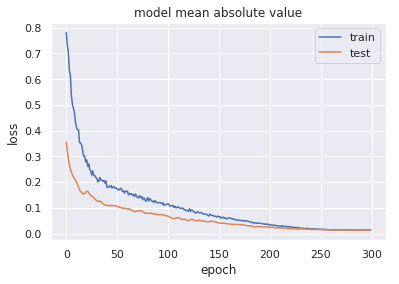

In [27]:
model = Sequential()
model.add(Conv1D(input_shape = (WINDOW, EMB_SIZE),
                 filters=16,
                 kernel_size=4,
                 padding='causal',
                 dilation_rate=1))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.5))

model.add(Conv1D(filters=8,
                 kernel_size=4,
                 padding='causal',
                 dilation_rate=2))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(64))
model.add(BatchNormalization())
model.add(LeakyReLU())


model.add(Dense(5))
# model.add(Activation('softmax'))

model.compile(optimizer=Adam(),
              loss='mean_absolute_error')

t0 = time()
history = model.fit(X_train, Y_train, 
          epochs = 300,
          batch_size = 32,
          verbose=1, 
          validation_data=(X_test, Y_test),
          shuffle=True)
t1 = time()
print("Time used:", t1-t0)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model mean absolute value')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

feature: realgdp
train-mae: 61.178978765259124
train-mse: 5056.043994473688
test-mae: 109.19775410249042
test-mse: 13881.639594658287
Time used for training: 30.137454986572266


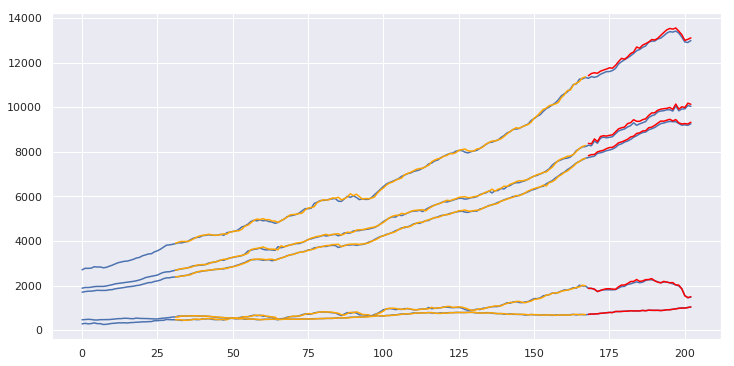

In [30]:
pred_train= model.predict(np.array(X_train))
pred_train_gdp_cvtback = np.exp(pred_train[:,0].reshape(-1,1) + np.log1p(mdata['realgdp'].tolist()[WINDOW:WINDOW+137]).reshape(-1,1))
pred_train_con_cvtback = np.exp(pred_train[:,1].reshape(-1,1) + np.log1p(mdata['realcons'].tolist()[WINDOW:WINDOW+137]).reshape(-1,1))
pred_train_inv_cvtback = np.exp(pred_train[:,2].reshape(-1,1) + np.log1p(mdata['realinv'].tolist()[WINDOW:WINDOW+137]).reshape(-1,1))
pred_train_gov_cvtback = np.exp(pred_train[:,3].reshape(-1,1) + np.log1p(mdata['realgovt'].tolist()[WINDOW:WINDOW+137]).reshape(-1,1))
pred_train_dpi_cvtback = np.exp(pred_train[:,4].reshape(-1,1) + np.log1p(mdata['realdpi'].tolist()[WINDOW:WINDOW+137]).reshape(-1,1))

pred_test = model.predict(np.array(X_test))
pred_test_gdp_cvtback = np.exp(pred_test[:,0].reshape(-1,1) + np.log1p(mdata['realgdp'].tolist()[-35:]).reshape(-1,1))
pred_test_con_cvtback = np.exp(pred_test[:,1].reshape(-1,1) + np.log1p(mdata['realcons'].tolist()[-35:]).reshape(-1,1))
pred_test_inv_cvtback = np.exp(pred_test[:,2].reshape(-1,1) + np.log1p(mdata['realinv'].tolist()[-35:]).reshape(-1,1))
pred_test_gov_cvtback = np.exp(pred_test[:,3].reshape(-1,1) + np.log1p(mdata['realgovt'].tolist()[-35:]).reshape(-1,1))
pred_test_dpi_cvtback = np.exp(pred_test[:,4].reshape(-1,1) + np.log1p(mdata['realdpi'].tolist()[-35:]).reshape(-1,1))

plt.figure(figsize=(12,6))
plt.plot(mdata['realgdp'], 'b')
plt.plot(range(WINDOW+1, WINDOW+1+137), pred_train_gdp_cvtback, 'orange')
plt.plot(range(137+WINDOW+1, 137+WINDOW+1+35), pred_test_gdp_cvtback, 'red')

# plt.figure(figsize=(12,2))
plt.plot(mdata['realcons'], 'b')
plt.plot(range(WINDOW+1, WINDOW+1+137), pred_train_con_cvtback, 'orange')
plt.plot(range(137+WINDOW+1, 137+WINDOW+1+35), pred_test_con_cvtback, 'red')

# plt.figure(figsize=(12,2))
plt.plot(mdata['realinv'], 'b')
plt.plot(range(WINDOW+1, WINDOW+1+137), pred_train_inv_cvtback, 'orange')
plt.plot(range(137+WINDOW+1, 137+WINDOW+1+35), pred_test_inv_cvtback, 'red')

# plt.figure(figsize=(12,2))
plt.plot(mdata['realgovt'], 'b')
plt.plot(range(WINDOW+1, WINDOW+1+137), pred_train_gov_cvtback, 'orange')
plt.plot(range(137+WINDOW+1, 137+WINDOW+1+35), pred_test_gov_cvtback, 'red')

# plt.figure(figsize=(12,2))
plt.plot(mdata['realdpi'], 'b')
plt.plot(range(WINDOW+1, WINDOW+1+137), pred_train_dpi_cvtback, 'orange')
plt.plot(range(137+WINDOW+1, 137+WINDOW+1+35), pred_test_dpi_cvtback, 'red')


print('feature: realgdp')
print('train-mae:', np.mean(np.abs(pred_train_gdp_cvtback.reshape(-1,1) - np.array(mdata['realgdp'][WINDOW:WINDOW+137]).reshape(-1,1))))
print('train-mse:', np.mean((pred_train_gdp_cvtback.reshape(-1,1) -np.array(mdata['realgdp'][WINDOW:WINDOW+137]).reshape(-1,1))**2))

print('test-mae:', np.mean(np.abs(pred_test_gdp_cvtback.reshape(-1,1) - np.array(mdata['realgdp'][-35:]).reshape(-1,1))))
print('test-mse:', np.mean((pred_test_gdp_cvtback.reshape(-1,1) -np.array(mdata['realgdp'][-35:]).reshape(-1,1))**2))
print("Time used for training:", t1-t0)

In [ ]:
## smoothing the prediction, worse results..

def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result


# plt.figure(figsize=(12,6))
# plt.plot(mdata['realgdp'], 'b')
# plt.plot(range(WINDOW+1, WINDOW+1+137), exponential_smoothing(pred_train_gdp_cvtback, .6), 'orange')
# plt.plot(range(137+WINDOW+1, 137+WINDOW+1+35), exponential_smoothing(pred_test_gdp_cvtback, .6), 'g')

# print('feature: realgdp')
# print('train-mae:', np.mean(np.abs(exponential_smoothing(pred_train_gdp_cvtback, .6) - np.array(mdata['realgdp'][WINDOW:WINDOW+137]))))
# print('train-mse:', np.mean((exponential_smoothing(pred_train_gdp_cvtback, .6) -np.array(mdata['realgdp'][WINDOW:WINDOW+137]))**2))

# print('test-mae:', np.mean(np.abs(exponential_smoothing(pred_test_gdp_cvtback, .6) - np.array(mdata['realgdp'][-35:]))))
# print('test-mse:', np.mean((exponential_smoothing(pred_test_gdp_cvtback, .6) -np.array(mdata['realgdp'][-35:]))**2))